Q1 : How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans : When we perform a matrix multiplication on a (n,k) matrix and (k,m) matrix,we get a matrix of dimension(n,m). In the matrix multiplication,we multiply each term of each row of (n,k) matrix to each term of each column of (k,m) matrix. Hence the number of multiplications would be (m* k *n). After the multiplication,we would add each term which was multiplied. Hence, the total number of additions would be (n * (k-1) * m).

Q2 : Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import numpy as np

A=[[3,2,4],[5,6,7],[8,9,0],[9,1,2]]

B=[[2,1,5,1,8],[7,3,0,4,8],[3,2,1,2,1]]

def numpy_method(X,Y):
  res_numpy=np.dot(X,Y)
  return res_numpy

def lists_method(X,Y):
  multi=[[0 for x in range(5)] for y in range(4)]
  for i in range(len(A)):
    for j in range (len(B[0])):
      for k in range (len(B)):
        multi[i][j]+= A[i][k] * B[k][j]

  return multi

import time

start= time.time()
for i in range(1,10000):
    numpy_method(A,B)
end1= time.time()

for i in range(1,10000):
    lists_method(A,B)
end2= time.time()

print(numpy_method(A,B))
print()
print(lists_method(A,B))
print()
print("Time using numpy method: ",end1-start)
print("Time using list of lists method: ",end2-end1)

[[ 32  17  19  19  44]
 [ 73  37  32  43  95]
 [ 79  35  40  44 136]
 [ 31  16  47  17  82]]

[[32, 17, 19, 19, 44], [73, 37, 32, 43, 95], [79, 35, 40, 44, 136], [31, 16, 47, 17, 82]]

Time using numpy method:  0.07589340209960938
Time using list of lists method:  0.19451475143432617


In [ ]:
###same question as above with randomly generated matrix

import numpy as np
n=3
k=3
m=4

A=np.random.rand(n,k)
B=np.random.rand(k,m)

def numpy_method(X,Y):
  res_numpy=np.dot(X,Y)
  return res_numpy

def lists_method(X,Y):
  multi=[[0 for x in range(4)] for y in range(3)]
  for i in range(len(A)):
    for j in range (len(B[0])):
      for k in range (len(B)):
        multi[i][j]+= A[i][k] * B[k][j]

  return multi

import time

t0 = time.time()
for i in range(1,10000):
    numpy_method(A,B)
t1 = time.time()

for i in range(1,10000):
    lists_method(A,B)
t2 = time.time()

print(numpy_method(A,B))
print()
print(lists_method(A,B))
print()

print("Time using numpy method: ",t1-t0)
print("Time using list of lists method: ", t2-t1)

[[0.95073434 0.30957839 0.68216345 0.96269161]
 [0.95459408 0.39843718 0.77900028 0.64272969]
 [1.41702911 0.72155169 1.13484312 0.95419917]]

[[0.950734338800039, 0.3095783945223754, 0.6821634466205361, 0.9626916145219667], [0.954594076841009, 0.3984371804537734, 0.7790002838429115, 0.6427296865411667], [1.4170291148849203, 0.721551693531909, 1.1348431171182742, 0.9541991684843383]]

Time using numpy method:  0.012522220611572266
Time using list of lists method:  0.36081743240356445


Q3 : Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [ ]:
import numpy as np

arr=[3,8,14,9,2,17,6,12]

def regular_method(arr):
  sorted_arr=sorted(arr)
  n=len(sorted_arr)
  mid=n//2
  if n%2==1:
    return(sorted_arr[mid])
  else:
    return((sorted_arr[mid-1]+sorted_arr[mid])/2)

print("Median by regular method: ",regular_method(arr))

def numpy_method(arr):
  return np.median(arr)

print("Median by numpy method: ",numpy_method(arr))

import time

t0 = time.time()
for i in range(1,10000):
    regular_method(arr)
t1 = time.time()

for i in range(1,10000):
    numpy_method(arr)
t2 = time.time()

print("Time using regular method: ",t1-t0)
print("Time using numpy method: ",t2-t1)

# def quickselect(arr,k):
#   if len(arr)==1:
#     return arr[0]

#   pivot=arr(len(arr)//2)


Median by regular method:  8.5
Median by numpy method:  8.5
Time using regular method:  0.012773513793945312
Time using numpy method:  0.21730971336364746


Q4 : What is the gradient of the following function with respect to x and y?





Q5 : Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
import jax
from jax import grad
import jax.numpy as jnp

def f(x,y):
  return x**2*y + y**3*jnp.sin(x)

a=1.0
b=2.0

jax_grad = grad(f, argnums=(0,1))(a, b)
analy_grad= (2*a*b+b**3*jnp.cos(a),a**2+3*b**2*jnp.sin(a))

print(jax_grad )
print(analy_grad)

(Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))
(Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))


Q6 : Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
import sympy as sp

x,y=sp.symbols('x y')
f=x**2*y + y**3*sp.sin(x)

grad_x=sp.diff(f,x)
grad_y=sp.diff(f,y)

gradient=sp.Matrix([grad_x,grad_y])

print(gradient)

Matrix([[2*x*y + y**3*cos(x)], [x**2 + 3*y**2*sin(x)]])


Q7 : Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [ ]:
import pandas as pd

data= {2022:
              {"Branch1":
                      {1:{"Roll No.":2300,"Name":"Aditi", "Marks" : {"Maths":94,"English": 98}},
                       2:{"Roll No.":2301,"Name":"Ada", "Marks" : {"Maths":90,"English": 93}}},
               "Branch2":
                      {1:{"Roll No.":2302,"Name":"Ayush", "Marks" : {"Maths":88,"English": 94}},
                       2:{"Roll No.":2303,"Name":"Rohan", "Marks" : {"Maths":79,"English": 91}}}
              },
       2023:
              {"Branch1":
                      {1:{"Roll No.":2304,"Name":"Monisha", "Marks" : {"Maths":74,"English": 88}},
                       2:{"Roll No.":2305,"Name":"Ananya", "Marks" : {"Maths":80,"English": 96}}},
               "Branch2":
                      {1:{"Roll No.":2306,"Name":"Divyansh", "Marks" : {"Maths":78,"English": 94}},
                       2:{"Roll No.":2307,"Name":"Rahul", "Marks" : {"Maths":91,"English": 99}}}
              },
       2024:
               {"Branch1":
                      {1:{"Roll No.":2308,"Name":"Simran", "Marks" : {"Maths":76,"English": 87}},
                       2:{"Roll No.":2309,"Name":"Arjun", "Marks" : {"Maths":90,"English": 98}}},
               "Branch2":
                      {1:{"Roll No.":23010,"Name":"Dhrishti", "Marks" : {"Maths":81,"English": 84}},
                       2:{"Roll No.":23011,"Name":"Bhoomi", "Marks" : {"Maths":89,"English": 71}}}
               },
       2025:
              {"Branch1":
                      {1:{"Roll No.":2308,"Name":"Rudra", "Marks" : {"Maths":99,"English": 90}},
                       2:{"Roll No.":2309,"Name":"Manu", "Marks" : {"Maths":80,"English": 83}}},
               "Branch2":
                      {1:{"Roll No.":23010,"Name":"Akshay", "Marks" : {"Maths":84,"English": 74}},
                       2:{"Roll No.":23011,"Name":"Riya", "Marks" : {"Maths":91,"English": 89}}}
               },}

data_f=pd.DataFrame(data).T
data_f

,Branch1,Branch2
2022,"{1: {'Roll No.': 2300, 'Name': 'Aditi', 'Marks...","{1: {'Roll No.': 2302, 'Name': 'Ayush', 'Marks..."
2023,"{1: {'Roll No.': 2304, 'Name': 'Monisha', 'Mar...","{1: {'Roll No.': 2306, 'Name': 'Divyansh', 'Ma..."
2024,"{1: {'Roll No.': 2308, 'Name': 'Simran', 'Mark...","{1: {'Roll No.': 23010, 'Name': 'Dhrishti', 'M..."
2025,"{1: {'Roll No.': 2308, 'Name': 'Rudra', 'Marks...","{1: {'Roll No.': 23010, 'Name': 'Akshay', 'Mar..."


Q8 : Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
class student:
  def __init__(self,roll_num,name,marks):
    self.roll_num=roll_num
    self.name=name
    self.marks=marks

class branch:
  def __init__(self,branch_num):
    self.students=[]
    self.branch_num=branch_num

  def add_st(self,student):
    self.students.append(student)

class year:
  def __init__(self,year):
    self.year=year
    self.branches=[]

  def add_br(self,branch):
    self.branches.append(branch)

class database:
  def __init__(self):
    self.years=[]

  def add_yr(self,year):
    self.years.append(year)


db=database()

yr_2022=year(2022)
branch1_2022=branch("Branch1")
branch1_2022.add_st(student(2300,"Aditi",{"Maths":91,"English":96}))
yr_2022.add_br(branch1_2022)
db.add_yr(yr_2022)
db

Q9 : Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

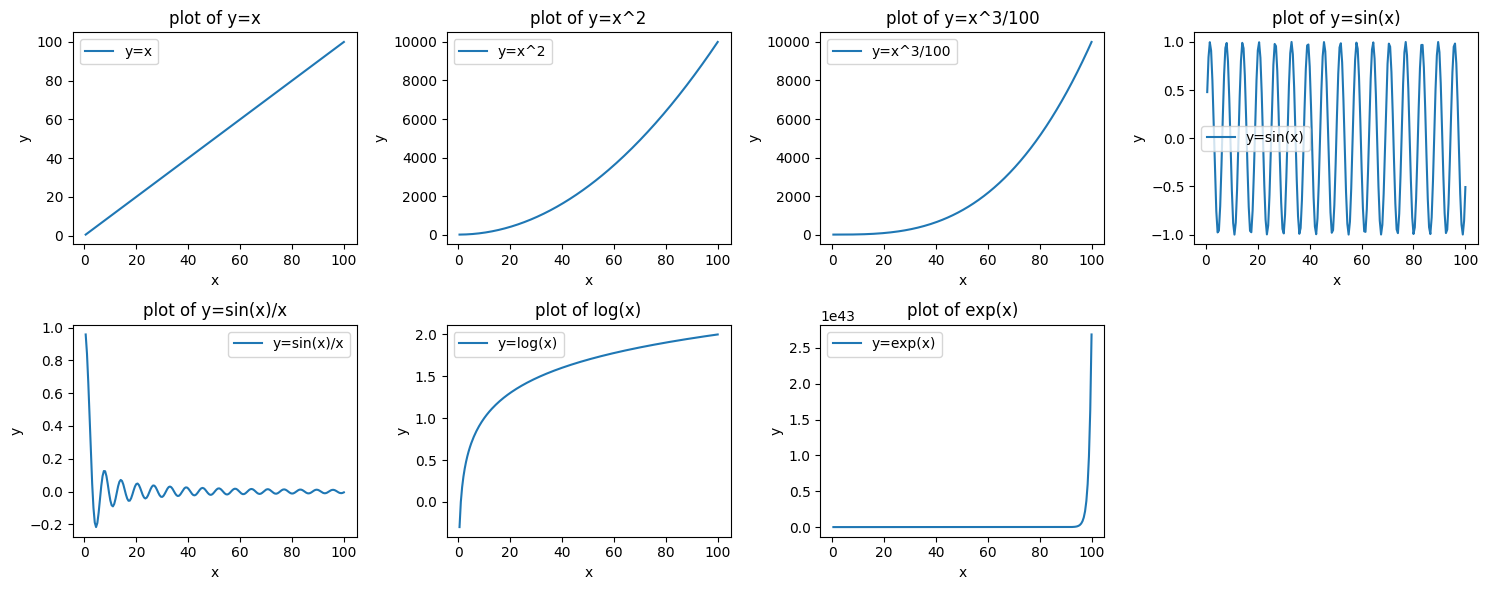

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

x=np.arange(0.5,100.5,0.5)
y1=x
y2=x**2
y3=x**3/100
y4=np.sin(x)
y5=np.sin(x)/x
y6=np.log10(x)
y7=np.exp(x)

fig,axes= plt.subplots(2,4,figsize=(15,6))

axes[0,0].plot(x,y1,label="y=x")
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
axes[0,0].set_title('plot of y=x')
axes[0,0].legend()


axes[0,1].plot(x,y2,label="y=x^2")
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('y')
axes[0,1].set_title('plot of y=x^2')
axes[0,1].legend()


axes[0,2].plot(x,y3,label="y=x^3/100")
axes[0,2].set_xlabel('x')
axes[0,2].set_ylabel('y')
axes[0,2].set_title('plot of y=x^3/100')
axes[0,2].legend()


axes[0,3].plot(x,y4,label="y=sin(x)")
axes[0,3].set_xlabel('x')
axes[0,3].set_ylabel('y')
axes[0,3].set_title('plot of y=sin(x)')
axes[0,3].legend()


axes[1,0].plot(x,y5,label="y=sin(x)/x")
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('y')
axes[1,0].set_title('plot of y=sin(x)/x')
axes[1,0].legend()


axes[1,1].plot(x,y6,label="y=log(x)")
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('y')
axes[1,1].set_title('plot of log(x)')
axes[1,1].legend()

axes[1,2].plot(x,y7,label="y=exp(x)")
axes[1,2].set_xlabel('x')
axes[1,2].set_ylabel('y')
axes[1,2].set_title('plot of exp(x)')
axes[1,2].legend()

axes[1,3].axis("off")
plt.tight_layout()

Q10 : Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
import numpy as np
import pandas as pd

mat=np.random.uniform(1,2,(20,5))

df=pd.DataFrame(mat,columns=['a','b','c','d','e'])

standard_dev=df.std()
highest_std=standard_dev.idxmax()

row_mean=df.mean(axis=1)
lowest_mean=row_mean.idxmin()

print("Column with highest standard deviation:",highest_std)
print("Row with lowest mean:",lowest_mean)

Column with highest standard deviation: e
Row with lowest mean: 11


Q11 : Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [ ]:
df['f']=df[['a','b','c','d','e']].sum(axis=1)

df['g']=np.where(df['f']<8,"LT8","GT8")
total_num_LT = (df['g']=="LT8").sum()

LT_std= df[df['g']=='LT8']['f'].std()
GT_std=df[df['g']=='GT8']['f'].std()

print("Number of rows which have LT8:",total_num_LT)
print("Standard deviation for row which have LT8 and GT8 is",LT_std,"and",GT_std,"respectively")

Number of rows which have LT8: 14
Standard deviation for row which have LT8 and GT8 is 0.4879013735600695 and 0.23826159827473373 respectively


Q12 : Write a small piece of code to explain broadcasting in numpy.

In [4]:
import numpy as np

A= np.array([[6, 11, 14],
             [28, 36, 1],
             [23, 3, 5]])
B= np.array([1, 4, 7])
C= A*B
print(f"Broadcasting A over B = {C}")

Broadcasting A over B = [[  6  44  98]
 [ 28 144   7]
 [ 23  12  35]]


Q13 : Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
import numpy as np

arr=np.array([2,7,11,4,9,15,1,10])

def fun_argmin(arr):
  index=0
  min=arr[0]
  for i in range(1,len(arr)):
    if arr[i]<min:
      min=arr[i]
      index=i
  return index

index_np=np.argmin(arr)

print("Minimum index using function:",fun_argmin(arr))
print("Minimum index using argmin:",index_np)

Minimum index using function: 6
Minimum index using argmin: 6
